# Stock Prediction by Keras

- tf.keras 를 이용
- pandas package 사용
- RNN, LSTM cell 사용
- S&P 500 DATA 사용

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import urllib

/Users/chjeong/.pyenv/versions/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Download S&P 500 Stock data and read

In [3]:
urllib.request.urlretrieve('https://github.com/CNuge/kaggle-code/raw/master/stock_data/all_stocks_5yr.csv')
data = pd.read_csv('./data/all_stocks_5yr.csv')


### Set data

In [6]:
cl = data[data['Name']=='MMM']
cl = cl[['close', 'low', 'high']].values

In [7]:
def set_data(cl):
    scl = MinMaxScaler()
    cl = scl.fit_transform(cl)
    return cl

In [8]:
cl = set_data(cl)

In [132]:
cl.shape

(1259, 3)

In [133]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

In [134]:
X, y = processData(cl,7)

In [135]:
print(X.shape)
print(y.shape)

(1251, 7, 3)
(1251,)


In [139]:
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


### Build the model

In [143]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256,input_shape=(7,3)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],3))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],3))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/300
1000/1000 [==============================] - 1s 1ms/step - loss: 4.7813e-04 - val_loss: 0.0030
Epoch 2/300
1000/1000 [==============================] - 0s 469us/step - loss: 0.0014 - val_loss: 9.6153e-04
Epoch 3/300
1000/1000 [==============================] - 0s 470us/step - loss: 4.4390e-04 - val_loss: 8.5375e-04
Epoch 4/300
1000/1000 [==============================] - 0s 474us/step - loss: 4.2497e-04 - val_loss: 0.0013
Epoch 5/300
1000/1000 [==============================] - 0s 469us/step - loss: 2.6863e-04 - val_loss: 0.0026
Epoch 6/300
1000/1000 [==============================] - 0s 486us/step - loss: 2.9202e-04 - val_loss: 0.0032
Epoch 7/300
1000/1000 [==============================] - 0s 480us/step - loss: 2.9246e-04 - val_loss: 0.0030
Epoch 8/300
1000/1000 [==============================] - 0s 473us/step - loss: 2.7075e-04 - val_loss: 0.0032
Epoch 9/300
1000/1000 [==============================] - 0s 472us/step - loss: 

1000/1000 [==============================] - 0s 457us/step - loss: 1.3246e-04 - val_loss: 7.2883e-04
Epoch 146/300
1000/1000 [==============================] - 0s 463us/step - loss: 1.3495e-04 - val_loss: 7.6870e-04
Epoch 147/300
1000/1000 [==============================] - 0s 459us/step - loss: 1.4158e-04 - val_loss: 9.1426e-04
Epoch 148/300
1000/1000 [==============================] - 0s 459us/step - loss: 1.6161e-04 - val_loss: 0.0014
Epoch 149/300
1000/1000 [==============================] - 0s 459us/step - loss: 1.6845e-04 - val_loss: 0.0037
Epoch 150/300
1000/1000 [==============================] - 0s 458us/step - loss: 1.7638e-04 - val_loss: 0.0048
Epoch 151/300
1000/1000 [==============================] - 0s 459us/step - loss: 2.1458e-04 - val_loss: 0.0024
Epoch 152/300
1000/1000 [==============================] - 0s 467us/step - loss: 2.2183e-04 - val_loss: 0.0028
Epoch 153/300
1000/1000 [==============================] - 0s 458us/step - loss: 2.4196e-04 - val_loss: 0.0047
Epo

Epoch 217/300
1000/1000 [==============================] - 1s 565us/step - loss: 1.2361e-04 - val_loss: 7.8268e-04
Epoch 218/300
1000/1000 [==============================] - 1s 540us/step - loss: 1.2351e-04 - val_loss: 7.8286e-04
Epoch 219/300
1000/1000 [==============================] - 1s 657us/step - loss: 1.2341e-04 - val_loss: 7.8302e-04
Epoch 220/300
1000/1000 [==============================] - 0s 497us/step - loss: 1.2331e-04 - val_loss: 7.8315e-04
Epoch 221/300
1000/1000 [==============================] - 0s 479us/step - loss: 1.2321e-04 - val_loss: 7.8327e-04
Epoch 222/300
1000/1000 [==============================] - 0s 475us/step - loss: 1.2311e-04 - val_loss: 7.8336e-04
Epoch 223/300
1000/1000 [==============================] - 1s 586us/step - loss: 1.2301e-04 - val_loss: 7.8344e-04
Epoch 224/300
1000/1000 [==============================] - 0s 469us/step - loss: 1.2290e-04 - val_loss: 7.8350e-04
Epoch 225/300
1000/1000 [==============================] - 1s 635us/step - loss:

Epoch 289/300
1000/1000 [==============================] - 0s 458us/step - loss: 9.9361e-05 - val_loss: 9.4864e-04
Epoch 290/300
1000/1000 [==============================] - 0s 459us/step - loss: 9.9898e-05 - val_loss: 9.5319e-04
Epoch 291/300
1000/1000 [==============================] - 0s 457us/step - loss: 1.0041e-04 - val_loss: 9.5857e-04
Epoch 292/300
1000/1000 [==============================] - 0s 453us/step - loss: 1.0106e-04 - val_loss: 9.6318e-04
Epoch 293/300
1000/1000 [==============================] - 0s 458us/step - loss: 1.0163e-04 - val_loss: 9.6878e-04
Epoch 294/300
1000/1000 [==============================] - 0s 462us/step - loss: 1.0237e-04 - val_loss: 9.7319e-04
Epoch 295/300
1000/1000 [==============================] - 0s 458us/step - loss: 1.0298e-04 - val_loss: 9.7908e-04
Epoch 296/300
1000/1000 [==============================] - 0s 462us/step - loss: 1.0381e-04 - val_loss: 9.8320e-04
Epoch 297/300
1000/1000 [==============================] - 0s 460us/step - loss:

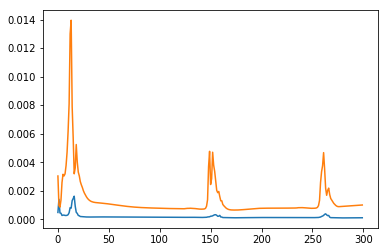

In [144]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [145]:
X_test[0]

array([[0.46959459, 0.47412787, 0.47781809],
       [0.46577002, 0.46725457, 0.46336961],
       [0.46800102, 0.47043185, 0.4655337 ],
       [0.46169046, 0.46556867, 0.45900961],
       [0.46717236, 0.46751394, 0.46235122],
       [0.46755482, 0.46783815, 0.46807969],
       [0.47176186, 0.47596875, 0.46935268]])

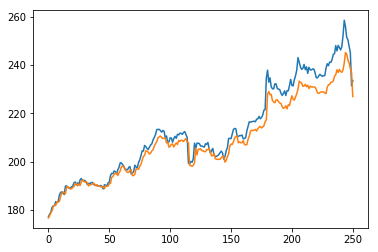

In [146]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [147]:
act = []
pred = []
#for i in range(250):
i=249
Xt = model.predict(X_test[i].reshape(1,7,3))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[237.01706]], actual:[[231.44]]


In [148]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

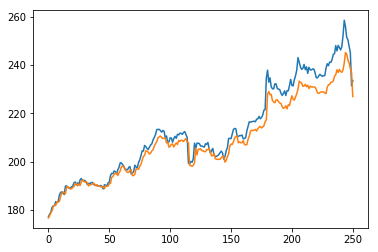

In [149]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [150]:
X_test[249]

array([[0.96003315, 0.94248476, 0.96836611],
       [1.        , 0.98327065, 1.        ],
       [0.98329934, 1.        , 0.99726306],
       [0.95480622, 0.97043185, 0.97403093],
       [0.94817695, 0.95869537, 0.95773662],
       [0.93185875, 0.93651602, 0.93838712],
       [0.91420194, 0.92808974, 0.92985806]])

In [151]:
X_test[248]

array([[0.93026517, 0.93697316, 0.92852142],
       [0.96003315, 0.94248476, 0.96836611],
       [1.        , 0.98327065, 1.        ],
       [0.98329934, 1.        , 0.99726306],
       [0.95480622, 0.97043185, 0.97403093],
       [0.94817695, 0.95869537, 0.95773662],
       [0.93185875, 0.93651602, 0.93838712]])